In [109]:
# import modules you need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 
import seaborn as sns
# import googlemaps
# import gmaps
import requests
import praw # python reddit api wrapper
from pandas.io.json import json_normalize #special package in pandas
import json
%matplotlib inline


In [110]:
car = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

C:\Users\Surafel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [111]:
df = pd.DataFrame(car)


In [112]:
# chages the format of the date
car['CRASH DATE'] = pd.to_datetime(car['CRASH DATE'])  
car

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2019-07-07,1:50,NaN,NaN,40.768227,-73.929146,POINT (-73.929146 40.768227),NaN,NaN,30 DRIVE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4165914,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2019-07-27,22:00,MANHATTAN,10037,40.810856,-73.939026,POINT (-73.939026 40.810856),EAST 132 STREET,5 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,4178809,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
2,2019-07-16,14:50,MANHATTAN,10024,40.782020,-73.971730,POINT (-73.97173 40.78202),TRANSVERSE ROAD NUMBER TWO,CENTRAL PARK WEST,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4172227,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,2019-07-29,11:50,MANHATTAN,10011,40.736350,-73.993385,POINT (-73.993385 40.73635),NaN,NaN,90 5 AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4179208,Station Wagon/Sport Utility Vehicle,Armored Truck,NaN,NaN,NaN
4,2019-07-07,0:54,NaN,NaN,40.657413,-73.983000,POINT (-73.983 40.657413),PROSPECT EXPRESSWAY EAST,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4165425,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676887,2012-11-18,12:00,BRONX,10463,40.885659,-73.909981,POINT (-73.9099811 40.8856586),JOHNSON AVENUE,WEST 235 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,107486,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1676888,2012-11-21,17:50,BROOKLYN,11206,40.701076,-73.940420,POINT (-73.9404204 40.7010761),HUMBOLDT STREET,FLUSHING AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,194815,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1676889,2012-11-20,11:42,QUEENS,11379,40.712442,-73.894019,POINT (-73.894019 40.7124417),METROPOLITAN AVENUE,65 LANE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,214583,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1676890,2012-11-20,23:59,MANHATTAN,10002,40.716115,-73.983619,POINT (-73.9836191 40.7161152),PITT STREET,BROOME STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,12609,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


In [113]:
#greater than the start date and smaller than the end date
car['Year']=car['CRASH DATE'].dt.year

df1 = car[(car['CRASH DATE'] < '2020-5-12') & (car['CRASH DATE'] >= '2019-01-01')]

In [114]:
# df1 = pd.DataFrame(df.loc[mask])
pd.set_option("display.max_columns", None)
df1

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Year
0,2019-07-07,1:50,NaN,NaN,40.768227,-73.929146,POINT (-73.929146 40.768227),NaN,NaN,30 DRIVE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4165914,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2019
1,2019-07-27,22:00,MANHATTAN,10037,40.810856,-73.939026,POINT (-73.939026 40.810856),EAST 132 STREET,5 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,4178809,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2019
2,2019-07-16,14:50,MANHATTAN,10024,40.782020,-73.971730,POINT (-73.97173 40.78202),TRANSVERSE ROAD NUMBER TWO,CENTRAL PARK WEST,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4172227,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2019
3,2019-07-29,11:50,MANHATTAN,10011,40.736350,-73.993385,POINT (-73.993385 40.73635),NaN,NaN,90 5 AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4179208,Station Wagon/Sport Utility Vehicle,Armored Truck,NaN,NaN,NaN,2019
4,2019-07-07,0:54,NaN,NaN,40.657413,-73.983000,POINT (-73.983 40.657413),PROSPECT EXPRESSWAY EAST,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4165425,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330655,2019-01-15,8:00,MANHATTAN,10025,40.806820,-73.961060,POINT (-73.96106 40.80682),AMSTERDAM AVENUE,WEST 116 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,Passing or Lane Usage Improper,NaN,NaN,NaN,4067412,Box Truck,Taxi,NaN,NaN,NaN,2019
330656,2019-01-16,18:04,BROOKLYN,11207,40.662743,-73.885124,POINT (-73.885124 40.662743),SCHENCK AVENUE,HEGEMAN AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,View Obstructed/Limited,View Obstructed/Limited,NaN,NaN,NaN,4056538,Sedan,Sedan,NaN,NaN,NaN,2019
330657,2019-01-14,10:09,BROOKLYN,11236,40.641080,-73.900280,POINT (-73.90028 40.64108),NaN,NaN,9517 AVENUE J,0.0,0.0,0,0,0,0,0,0,Turning Improperly,Unspecified,NaN,NaN,NaN,4060215,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2019
330658,2019-01-14,19:29,BROOKLYN,11238,40.677513,-73.959130,POINT (-73.95913 40.677513),BERGEN STREET,CLASSON AVENUE,NaN,1.0,0.0,1,0,0,0,0,0,Failure to Yield Right-of-Way,NaN,NaN,NaN,NaN,4057230,Sedan,NaN,NaN,NaN,NaN,2019


In [122]:
df1.head()
train=df1.sample(frac=0.3,random_state=100)
df1['CRASH DATE']=pd.to_datetime(df1['CRASH DATE'])
df1['Year']=df1['CRASH DATE'].dt.year
df1['Month']=df1['CRASH DATE'].dt.month
month_map={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df1['Month'].replace(month_map,inplace=True)


In [123]:
df1 = df1.replace(np.nan, '', regex=True)


# creates a new coumn called hour of day 
df1['Hour Of Day']= pd.to_datetime(df1['CRASH TIME']).dt.strftime('%H')

df1.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Year,Hour Of Day,Month
0,2019-07-07,1:50,,,40.7682,-73.9291,POINT (-73.929146 40.768227),,,30 DRIVE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,,,,4165914,Taxi,Station Wagon/Sport Utility Vehicle,,,,2019,01,Jul
1,2019-07-27,22:00,MANHATTAN,10037,40.8109,-73.939,POINT (-73.939026 40.810856),EAST 132 STREET,5 AVENUE,,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,,,,4178809,Station Wagon/Sport Utility Vehicle,Sedan,,,,2019,22,Jul
2,2019-07-16,14:50,MANHATTAN,10024,40.782,-73.9717,POINT (-73.97173 40.78202),TRANSVERSE ROAD NUMBER TWO,CENTRAL PARK WEST,,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,,,,4172227,Taxi,Station Wagon/Sport Utility Vehicle,,,,2019,14,Jul
3,2019-07-29,11:50,MANHATTAN,10011,40.7364,-73.9934,POINT (-73.993385 40.73635),,,90 5 AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,,,,4179208,Station Wagon/Sport Utility Vehicle,Armored Truck,,,,2019,11,Jul
4,2019-07-07,0:54,,,40.6574,-73.983,POINT (-73.983 40.657413),PROSPECT EXPRESSWAY EAST,,,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,,,,4165425,Sedan,Station Wagon/Sport Utility Vehicle,,,,2019,00,Jul


In [124]:
df1.head()
# counts the types of vehicle invoved in the accsident 
# the other vechicale type code has the same category of vehicles but diffrent values 
df1['VEHICLE TYPE CODE 1'].value_counts()

Sedan                                  114675
Station Wagon/Sport Utility Vehicle     97039
Taxi                                    11813
Pick-up Truck                            7547
Box Truck                                5082
                                        ...  
towe                                        1
MOBIL                                       1
Enclosed Body - Removable Enclosure         1
golf                                        1
santa                                       1
Name: VEHICLE TYPE CODE 1, Length: 397, dtype: int64

In [125]:
# groups my year and counts the total for each type of accidents 
year_acc =  [df1.groupby(['Year'])['NUMBER OF MOTORIST INJURED'].sum(),df1.groupby(['Year'])['NUMBER OF PERSONS KILLED'].sum()
           ,df1.groupby(['Year'])['NUMBER OF PEDESTRIANS INJURED'].sum(),df1.groupby(['Year'])['NUMBER OF PEDESTRIANS KILLED'].sum(),
           df1.groupby(['Year'])['NUMBER OF CYCLIST INJURED'].sum(),df1.groupby(['Year'])['NUMBER OF CYCLIST KILLED'].sum(),
           df1.groupby(['Year'])['NUMBER OF MOTORIST INJURED'].sum(),df1.groupby(['Year'])['NUMBER OF MOTORIST KILLED'].sum()]
year_acc

[Year
 2019    46282
 2020    10098
 Name: NUMBER OF MOTORIST INJURED, dtype: int64, Year
 2019    244.0
 2020     62.0
 Name: NUMBER OF PERSONS KILLED, dtype: float64, Year
 2019    10568
 2020     2498
 Name: NUMBER OF PEDESTRIANS INJURED, dtype: int64, Year
 2019    131
 2020     29
 Name: NUMBER OF PEDESTRIANS KILLED, dtype: int64, Year
 2019    4529
 2020     782
 Name: NUMBER OF CYCLIST INJURED, dtype: int64, Year
 2019    28
 2020     3
 Name: NUMBER OF CYCLIST KILLED, dtype: int64, Year
 2019    46282
 2020    10098
 Name: NUMBER OF MOTORIST INJURED, dtype: int64, Year
 2019    85
 2020    30
 Name: NUMBER OF MOTORIST KILLED, dtype: int64]

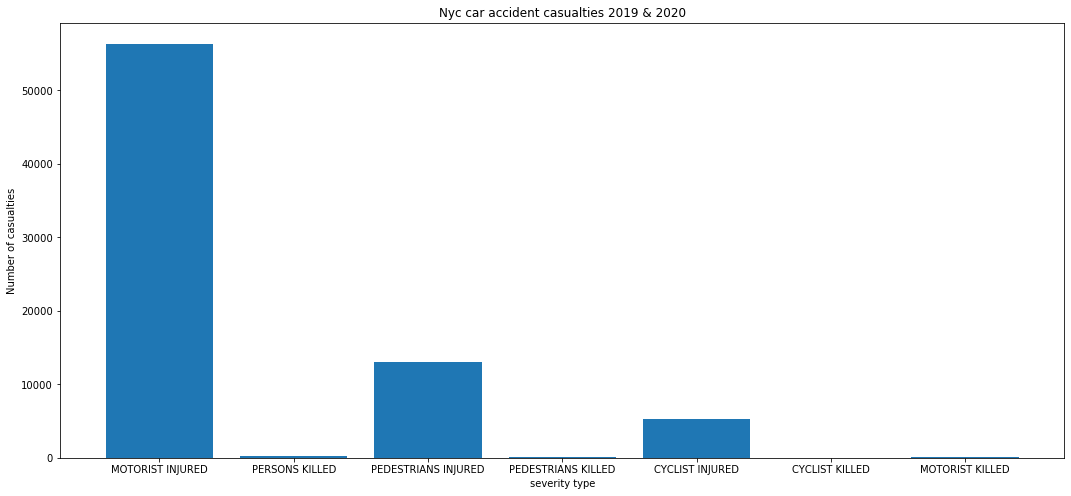

In [126]:
severe =  [df1['NUMBER OF MOTORIST INJURED'].sum(),df1['NUMBER OF PERSONS KILLED'].sum()
           ,df1['NUMBER OF PEDESTRIANS INJURED'].sum(),df1['NUMBER OF PEDESTRIANS KILLED'].sum(),
           df1['NUMBER OF CYCLIST INJURED'].sum(),df1['NUMBER OF CYCLIST KILLED'].sum(),
           df1['NUMBER OF MOTORIST INJURED'].sum(),df1['NUMBER OF MOTORIST KILLED'].sum()]

typeOfAcc= ["MOTORIST INJURED",'PERSONS KILLED',
            'PEDESTRIANS INJURED','PEDESTRIANS KILLED',
            'CYCLIST INJURED','CYCLIST KILLED',
           'MOTORIST INJURED','MOTORIST KILLED']

plt.bar(typeOfAcc,severe)
plt.xlabel('severity type')
plt.ylabel('Number of casualties')
plt.title('Nyc car accident casualties 2019 & 2020')
plt.gcf().set_size_inches(18, 8)
plt.show()

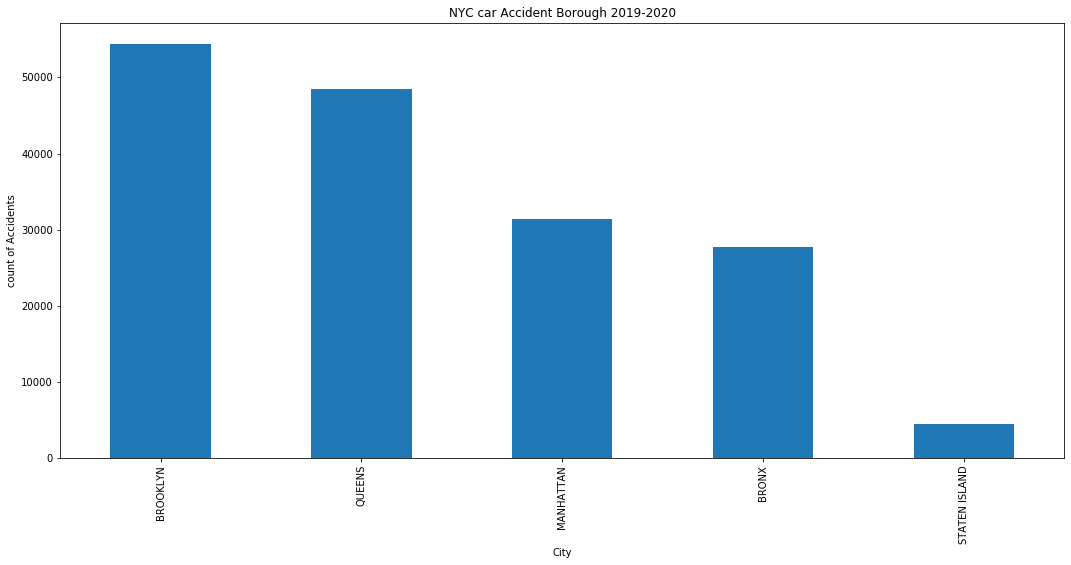

In [127]:
# what city the accident 
df1['BOROUGH'].replace('',np.nan, inplace = True) # Lables empty cells in Borough nan
pd.value_counts(df1['BOROUGH']).plot.bar()
plt.xlabel('City')
plt.ylabel('count of Accidents')
plt.title('NYC car Accident Borough 2019-2020')

plt.gcf().set_size_inches(18, 8)
plt.show()

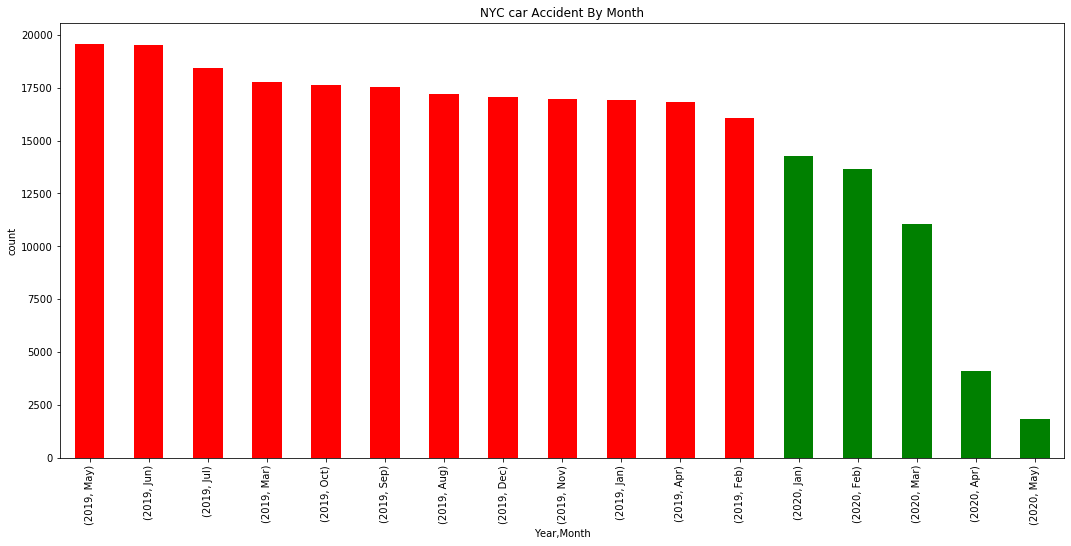

In [128]:
#pd.value_counts(df1['BOROUGH']).plot.bar()
year = df1[['Year','Month']]
#pd.value_counts.groupby('Year')(df1['Month']).plot.bar()
# this make a bar plot by grouping it by year 
# There most likely better ways to do this but this was faster 
df1.groupby(['Year'])['Month'].value_counts().plot.bar( color=['red','red','red','red',
                                                               'red','red','red','red',
                                                               'red','red','red','red',
                                                               'green', 'green', 'green',
                                                               'green', 'green', 'green', 
                                                               'green', 'green'])
plt.ylabel('count')
plt.title('NYC car Accident By Month')

plt.gcf().set_size_inches(18, 8)


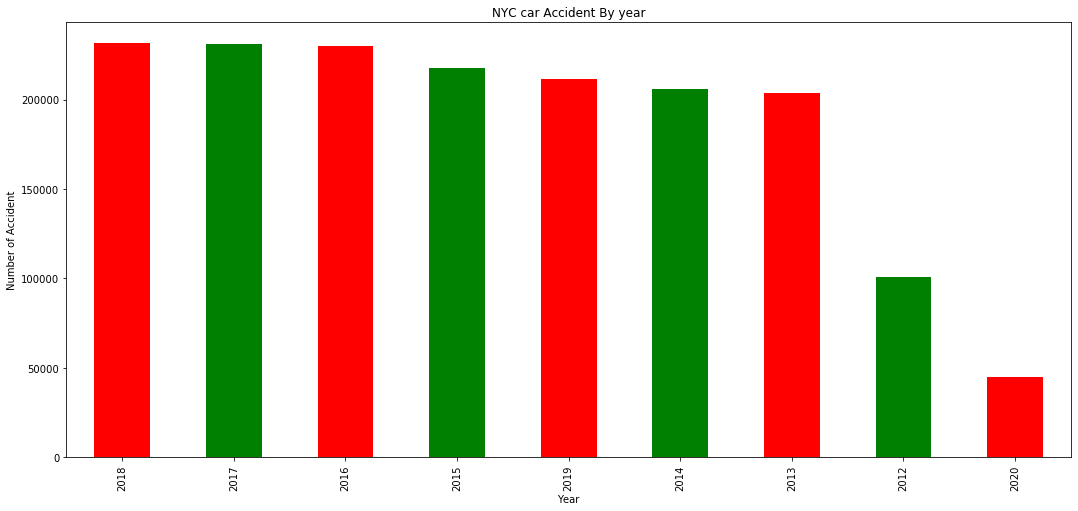

In [129]:
pd.value_counts(car['Year']).plot.bar(color=['red','green'])
plt.xlabel('Year')
plt.ylabel('Number of Accident')
plt.title('NYC car Accident By year')

plt.gcf().set_size_inches(18, 8)

plt.show()

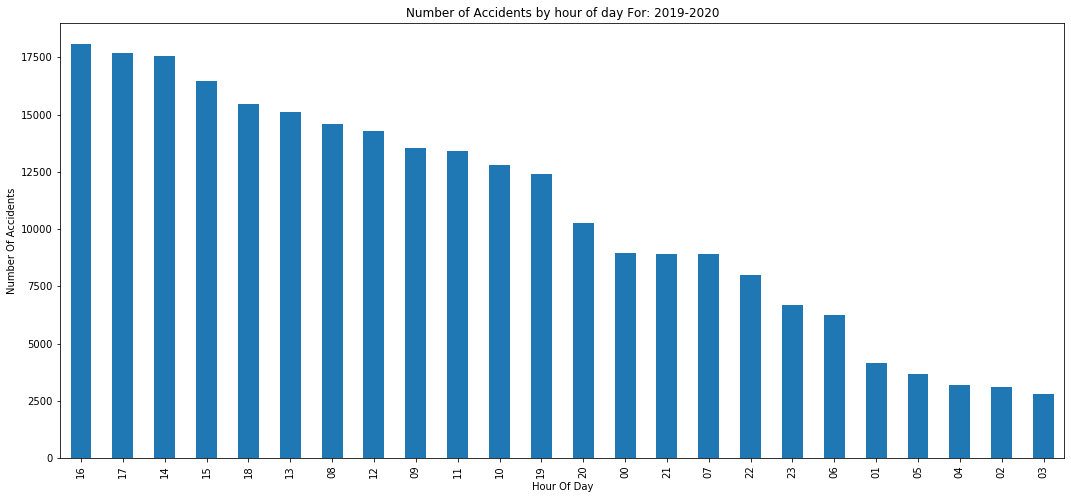

In [132]:
pd.value_counts(df1['Hour Of Day']).plot.bar()
plt.title('Number of Accidents by hour of day For: 2019-2020')
plt.xlabel('Hour Of Day')
plt.ylabel("Number Of Accidents")
plt.gcf().set_size_inches(18, 8)


In [80]:
import pandas as pd
from sodapy import Socrata
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)
# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")
results = client.get("h9gi-nx95", limit= 1676892)
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)